1.load the dataset

In [1]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



# Load the Titanic dataset

titanic_df = sns.load_dataset('titanic')



# Preview the first few rows

titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


from matplotlib import pyplot as plt
_df_0['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sibsp'].plot(kind='hist', bins=20, title='sibsp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

2. Understanding Data Distributions

i.Numerical Variables Analysis

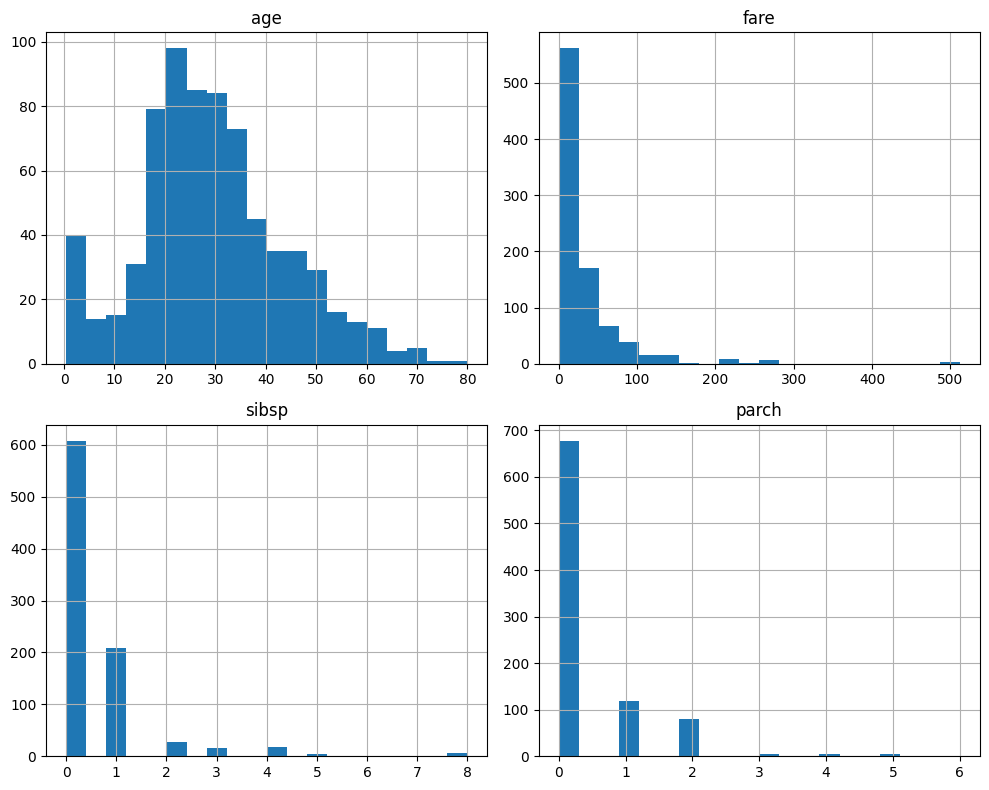

In [20]:
# Histograms for numerical variables
num_cols = ['age', 'fare', 'sibsp', 'parch']
titanic_df[num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

ii . Categorical Variables Analysis

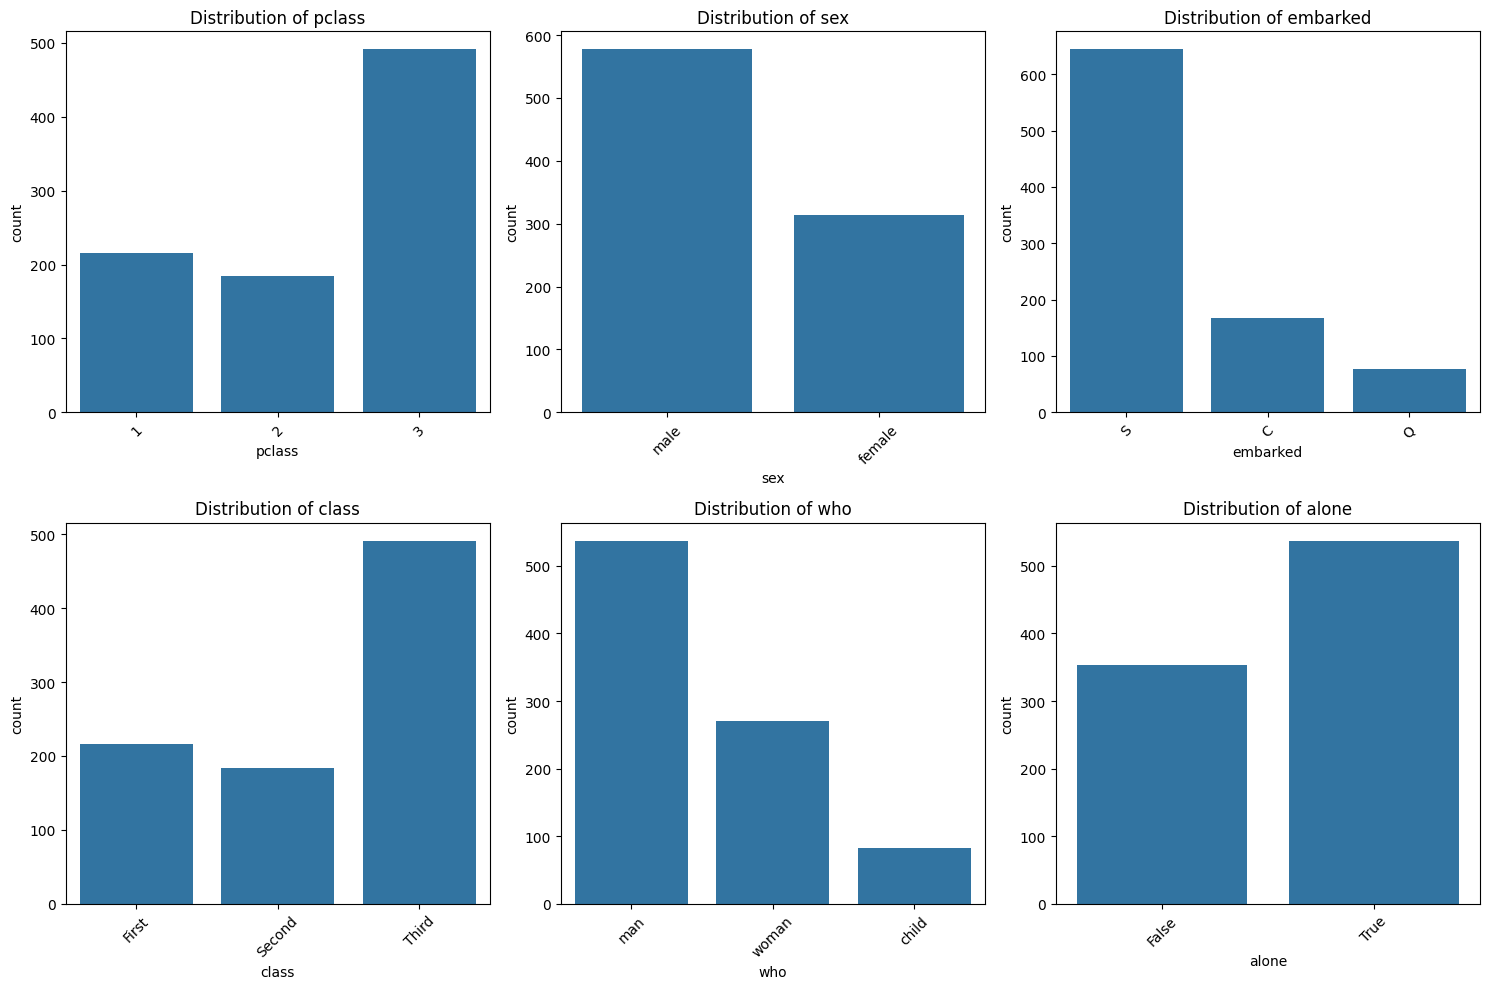

In [35]:
# Bar plots for categorical variables
cat_cols = ['pclass', 'sex', 'embarked', 'class', 'who', 'alone']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=titanic_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Check Data Summary and Missing Values

In [4]:
# Dataset overview

print("Shape of the dataset:", titanic_df.shape)

print("\nColumns in the dataset:\n", titanic_df.columns)


# Check for missing values

print("\nMissing values in each column:\n", titanic_df.isnull().sum())

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


4.Data types and summary statistics

In [6]:
# Data types and summary statistics

print("\nData types:\n", titanic_df.dtypes)

print("\nSummary Statistics:\n", titanic_df.describe(include='all'))


Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.0000

In [37]:
print("\nMissing values in each column:\n", titanic_df.isnull().sum())

print("\nPercentage of missing values in each column:\n", (titanic_df.isnull().sum()/len(titanic_df))*100)



Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
AgeGroup       177
ageGroup       177
dtype: int64

Percentage of missing values in each column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
AgeGroup       19.865320
ageGroup       19.865320
dtype: float64


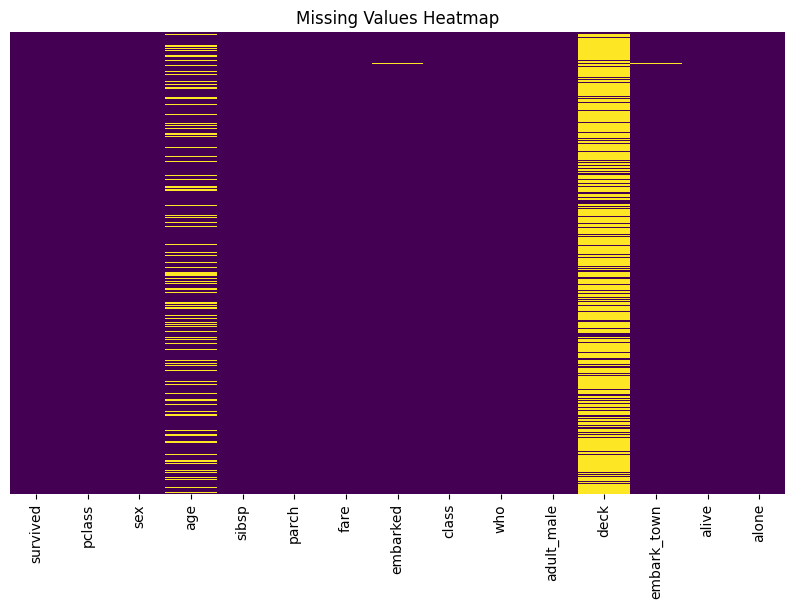

In [10]:
# Create the heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap')

plt.show()

In [12]:
#Impute Missing Values

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor



# Create a copy to avoid modifying the original DataFrame

titanic_df_filled = titanic_df.copy()



# Separate numerical and categorical columns

numerical_cols = titanic_df_filled.select_dtypes(include=['number']).columns

categorical_cols = titanic_df_filled.select_dtypes(exclude=['number']).columns



# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

titanic_df_filled[numerical_cols] = imputer_num.fit_transform(titanic_df_filled[numerical_cols])



# Fill categorical features with the mode (most frequent value)

for col in categorical_cols:

    titanic_df_filled[col] = titanic_df_filled[col].fillna(titanic_df_filled[col].mode()[0])



# Verify if there are any missing values left

print("\nMissing values after imputation:\n", titanic_df_filled.isnull().sum())


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


5. Detecting Outliers

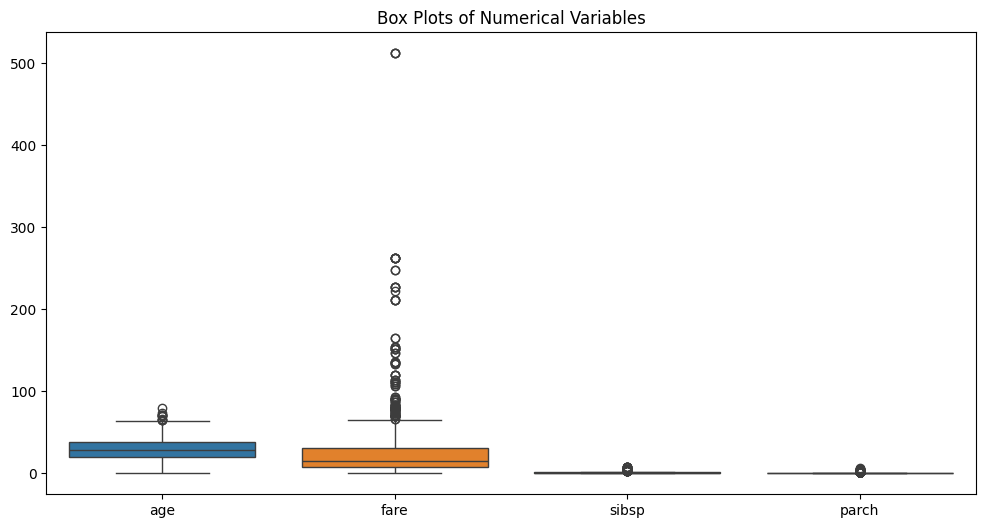

In [28]:
# Box plots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df[['age', 'fare', 'sibsp', 'parch']])
plt.title('Box Plots of Numerical Variables')
plt.show()

In [38]:
# Top 10 highest fares
print(titanic_df.sort_values('fare', ascending=False).head(10)[['pclass', 'fare', 'age', 'sex', 'survived']])

     pclass      fare   age     sex  survived
679       1  512.3292  36.0    male         1
258       1  512.3292  35.0  female         1
737       1  512.3292  35.0    male         1
88        1  263.0000  23.0  female         1
438       1  263.0000  64.0    male         0
341       1  263.0000  24.0  female         1
27        1  263.0000  19.0    male         0
742       1  262.3750  21.0  female         1
311       1  262.3750  18.0  female         1
299       1  247.5208  50.0  female         1


6. Uncovering Relationships Between Variables


 *Relationship Analysis*

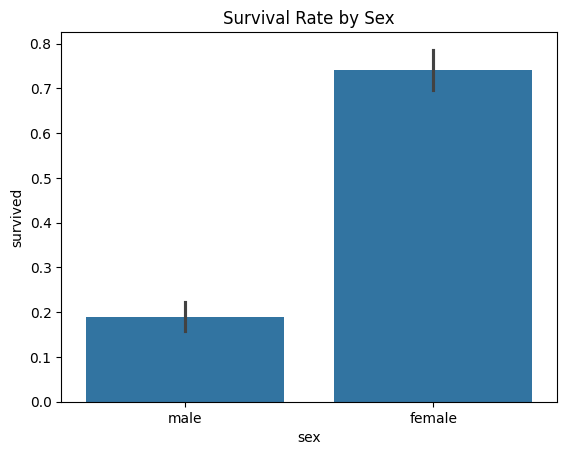

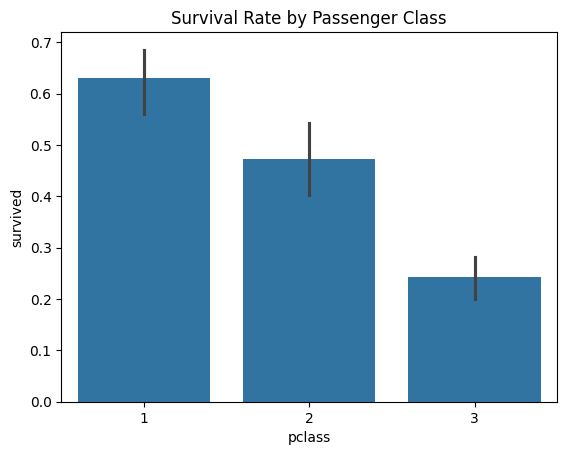

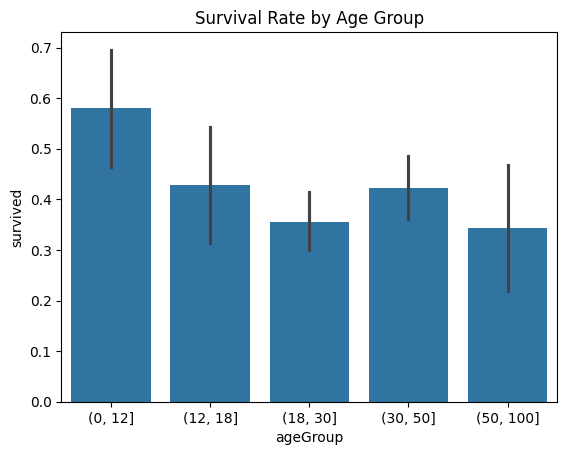

In [32]:
# Survival rate by sex
sns.barplot(data=titanic_df, x='sex', y='survived')
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by passenger class
sns.barplot(data=titanic_df, x='pclass', y='survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by age groups
titanic_df['ageGroup'] = pd.cut(titanic_df['age'], bins=[0, 12, 18, 30, 50, 100])
sns.barplot(data=titanic_df, x='ageGroup', y='survived')
plt.title('Survival Rate by Age Group')
plt.show()

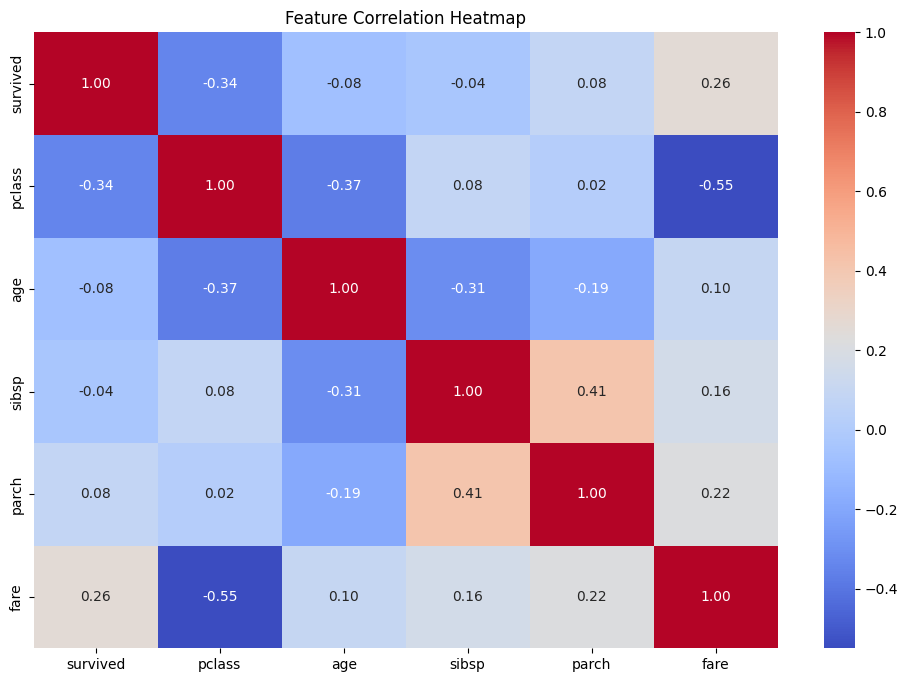

In [34]:
# Correlation heatmap

plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features = titanic_df.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()

7. Advanced Visualizations

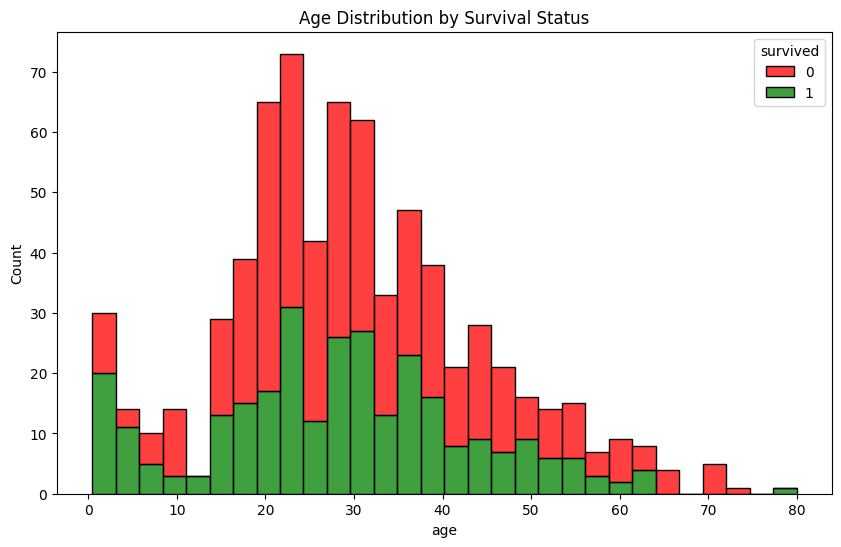

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='age', hue='survived', bins=30,
             multiple='stack', palette=['red', 'green'])
plt.title('Age Distribution by Survival Status')
plt.show()

Fare vs. Age with Survival Status

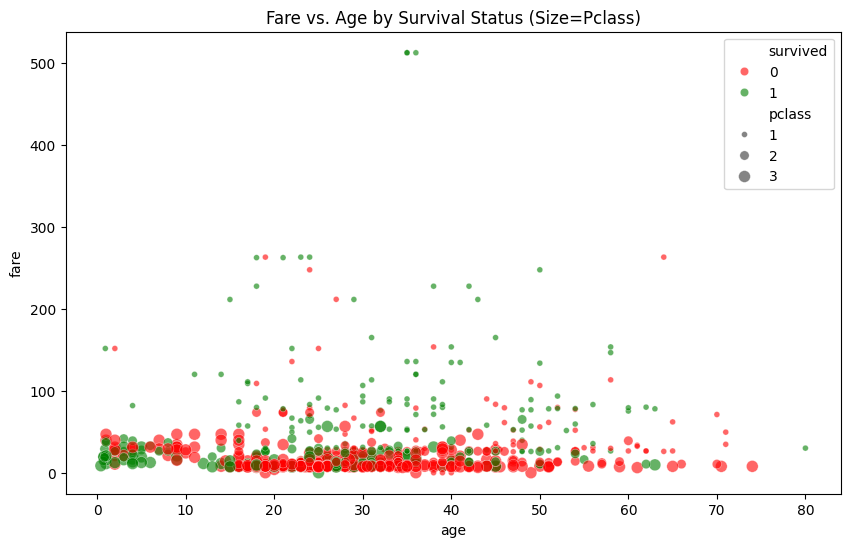

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_df, x='age', y='fare', hue='survived',
                palette=['red', 'green'], alpha=0.6, size='pclass')
plt.title('Fare vs. Age by Survival Status (Size=Pclass)')
plt.show()